In [1]:
from imutils import paths
import pandas as pd
import os
import shutil
from sklearn.metrics import confusion_matrix
import seaborn as sns
import cv2
import itertools
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [2]:
imagePaths=list(paths.list_images("/Users/charithsaibanda/Downloads"))

In [3]:
imagePaths

['/Users/charithsaibanda/Downloads/IMG_0165.JPG',
 '/Users/charithsaibanda/Downloads/01e857bb-0a95-4638-b741-cbe2c07c5998.JPG',
 '/Users/charithsaibanda/Downloads/G2_Team_08.png',
 '/Users/charithsaibanda/Downloads/38348-3000x2000-desktop-hd-the-weeknd-background-image.jpg',
 '/Users/charithsaibanda/Downloads/Visual Studio Code.app/Contents/Resources/app/out/vs/workbench/contrib/extensions/browser/media/theme-icon.png',
 '/Users/charithsaibanda/Downloads/Visual Studio Code.app/Contents/Resources/app/out/vs/workbench/contrib/welcomeGettingStarted/common/copilotStep.png',
 '/Users/charithsaibanda/Downloads/Visual Studio Code.app/Contents/Resources/app/out/vs/workbench/contrib/welcomeGettingStarted/common/media/dark.png',
 '/Users/charithsaibanda/Downloads/Visual Studio Code.app/Contents/Resources/app/out/vs/workbench/contrib/welcomeGettingStarted/common/media/light.png',
 '/Users/charithsaibanda/Downloads/Visual Studio Code.app/Contents/Resources/app/out/vs/workbench/contrib/welcomeGetti

In [4]:
TRAIN_PATH = "/Users/charithsaibanda/Downloads/covid19/Dataset/Train"
VAL_PATH = "/Users/charithsaibanda/Downloads/covid19/Dataset/Val"

In [5]:
    import numpy as np
    import matplotlib.pyplot as plt
    import keras
    from keras.layers import *
    from keras.models import *
    from keras.preprocessing import image

In [6]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)
test_dataset = image.ImageDataGenerator(rescale = 1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(
    '/Users/charithsaibanda/Downloads/covid19/Dataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 288 images belonging to 2 classes.


In [8]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [9]:
validation_generator = test_dataset.flow_from_directory(
    '/Users/charithsaibanda/Downloads/covid19/Dataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 60 images belonging to 2 classes.


In [11]:
from keras.applications import InceptionV3

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])




87910968/87910968 [==============================] - 176s 2us/step


In [12]:
hist = model.fit_generator(train_generator, steps_per_epoch=8, epochs=100, validation_data=validation_generator, validation_steps=2)

/var/folders/c6/3q9kb4d157j9y0l712wfjdl80000gn/T/ipykernel_3264/1358879331.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_generator, steps_per_epoch=8, epochs=100, validation_data=validation_generator, validation_steps=2)


Epoch 1/100


2023-06-16 10:02:15.762506: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


8/8 [==============================] - ETA: 0s - loss: 1.1021 - accuracy: 0.8672

2023-06-16 10:02:47.421182: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


8/8 [==============================] - 38s 4s/step - loss: 1.1021 - accuracy: 0.8672 - val_loss: 0.9692 - val_accuracy: 0.9667
Epoch 2/100
8/8 [==============================] - 27s 3s/step - loss: 0.9040 - accuracy: 0.9492 - val_loss: 1.6826 - val_accuracy: 0.9667
Epoch 3/100
8/8 [==============================] - 29s 4s/step - loss: 1.0885 - accuracy: 0.9570 - val_loss: 0.1971 - val_accuracy: 0.9500
Epoch 4/100
8/8 [==============================] - 29s 4s/step - loss: 0.3405 - accuracy: 0.9727 - val_loss: 0.3758 - val_accuracy: 0.9667
Epoch 5/100
8/8 [==============================] - 26s 3s/step - loss: 0.2566 - accuracy: 0.9766 - val_loss: 0.1548 - val_accuracy: 0.9667
Epoch 6/100
8/8 [==============================] - 28s 3s/step - loss: 0.1577 - accuracy: 0.9727 - val_loss: 0.0709 - val_accuracy: 0.9667
Epoch 7/100
8/8 [==============================] - 28s 3s/step - loss: 0.0367 - accuracy: 0.9844 - val_loss: 0.1972 - val_accuracy: 0.9667
Epoch 8/100
8/8 [======================

In [32]:
final_accuracy = hist.history['accuracy'][-1]
print("Final Accuracy:", final_accuracy)

Final Accuracy: 0.9921875


In [33]:
final_loss = hist.history['loss'][-1]
print("Final Loss:", final_loss)

Final Loss: 0.021080244332551956


In [13]:
model.save("Detection_Covid_19.h5")

/Users/charithsaibanda/Downloads/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
model = load_model("Detection_Covid_19.h5")
import os
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [15]:
y_actual = []
y_test = []

In [16]:
import tensorflow as tf


In [17]:
for i in os.listdir("/Users/charithsaibanda/Downloads/covid19/Dataset/Val/Normal"):
  img = tf.keras.utils.load_img("/Users/charithsaibanda/Downloads/covid19/Dataset/Val/Normal/"+i,target_size=(224,224))
  img = tf.keras.utils.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p = (model.predict(img) > 0.5).astype("int32")

  y_test.append(p[0,0])
  y_actual.append(1)

1/1 [==============================] - 0s 93ms/step


In [18]:
for i in os.listdir("/Users/charithsaibanda/Downloads/covid19/Dataset/Val/Covid"):
  img = tf.keras.utils.load_img("/Users/charithsaibanda/Downloads/covid19/Dataset/Val/Covid/"+i,target_size=(224,224))
  img = tf.keras.utils.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p = (model.predict(img) > 0.5).astype("int32")
  y_test.append(p[0,0])
  y_actual.append(0)

1/1 [==============================] - 0s 83ms/step


In [19]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
cm = confusion_matrix(y_actual,y_test)

In [22]:
import seaborn as sns

In [23]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
class_names = ["Covid-19","Normal"]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap="plasma"):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[30  0]
 [30  0]]


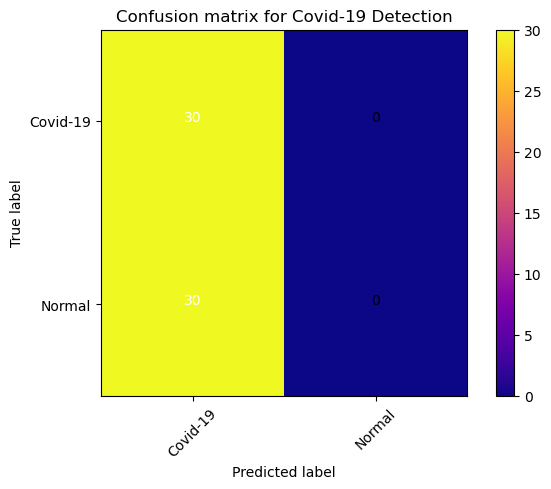

In [24]:
plt.figure()
plot_confusion_matrix(cm, classes=class_names,
                      title='Confusion matrix for Covid-19 Detection',cmap="plasma")

In [25]:
history = hist
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


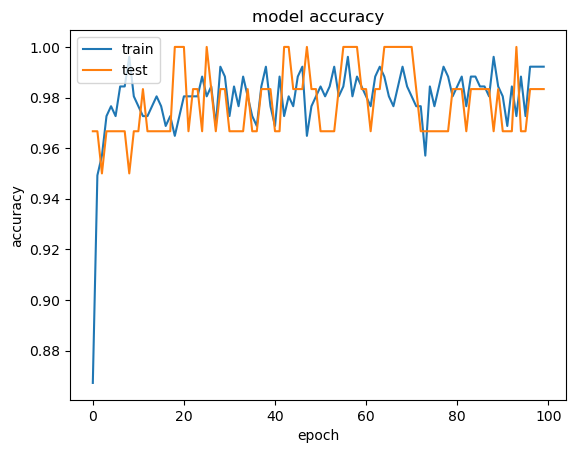

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

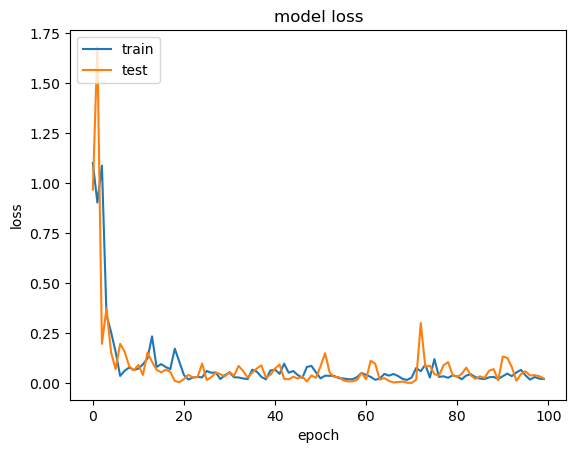

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 83ms/step
This Xray Image is of positive covid-19 patient
Prediction Of Our Model :  Positive For Covid-19


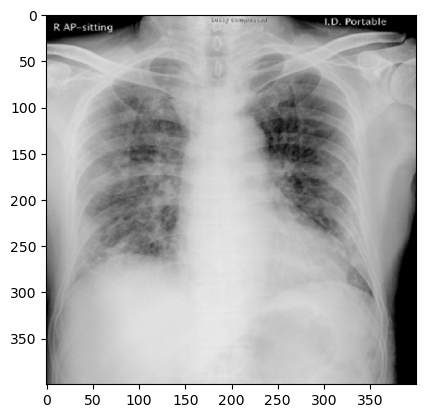

In [28]:
import numpy as np
# from google.colab.patches import cv2_imshow
import cv2
from keras.preprocessing import image
xtest_image = tf.keras.utils.load_img('/Users/charithsaibanda/Downloads/covid19/Dataset/Prediction/ryct.2020200034.fig5-day7.jpeg', target_size = (224, 224))
xtest_image = tf.keras.utils.img_to_array(xtest_image)
xtest_image = np.expand_dims(xtest_image, axis = 0)
results = (model.predict(xtest_image) > 0.5).astype("int32")
# training_set.class_indices
imggg = cv2.imread('/Users/charithsaibanda/Downloads/covid19/Dataset/Prediction/ryct.2020200034.fig5-day7.jpeg')
print("This Xray Image is of positive covid-19 patient")
imggg = np.array(imggg)
imggg = cv2.resize(imggg,(400,400))
plt.imshow(imggg)
# cv2_imshow(imggg)
# print(results)
if results[0][0] == 0:
    prediction = 'Positive For Covid-19'
else:
    prediction = 'Negative for Covid-19'
print("Prediction Of Our Model : ",prediction)

1/1 [==============================] - 0s 80ms/step
This Xray Image is of positive covid-19 patient
Prediction Of Our Model :  Positive For Covid-19


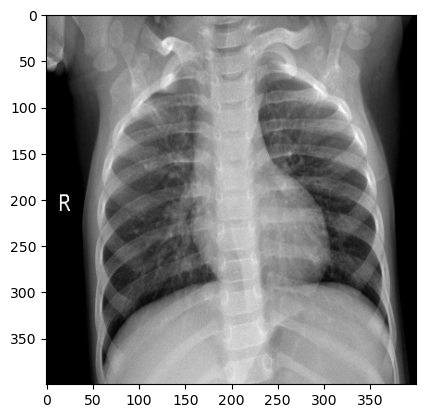

In [29]:
import numpy as np
# from google.colab.patches import cv2_imshow
import cv2
from keras.preprocessing import image
xtest_image = tf.keras.utils.load_img('/Users/charithsaibanda/Downloads/covid19/Dataset/Prediction/NORMAL2-IM-0354-0001.jpeg', target_size = (224, 224))
xtest_image = tf.keras.utils.img_to_array(xtest_image)
xtest_image = np.expand_dims(xtest_image, axis = 0)
results = (model.predict(xtest_image) > 0.5).astype("int32")
# training_set.class_indices
imggg = cv2.imread('/Users/charithsaibanda/Downloads/covid19/Dataset/Prediction/NORMAL2-IM-0354-0001.jpeg')
print("This Xray Image is of positive covid-19 patient")
imggg = np.array(imggg)
imggg = cv2.resize(imggg,(400,400))
plt.imshow(imggg)
# cv2_imshow(imggg)
# print(results)
if results[0][0] == 0:
    prediction = 'Positive For Covid-19'
else:
    prediction = 'Negative for Covid-19'
print("Prediction Of Our Model : ",prediction)